In [1]:
import os

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/azael/OneDrive/Cursos/Maestria/Tesis/src'

In [4]:
from utilities.load_data import load_fullECAI
from utilities.evaluation import *

from xgboost import Booster, DMatrix, XGBClassifier
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [6]:
index = pd.read_csv('../Replication/[Replication] Explainable Machine Learning in credit risk management/Replication code/random_index.csv').values.T[0]
train_indexr = pd.read_csv('../Replication/[Replication] Explainable Machine Learning in credit risk management/Replication code/train_index.csv').values.T[0]
dataset = load_fullECAI()

In [7]:
train_index = index[train_indexr-1] - 1
test_index = np.delete(index, train_indexr-1) - 1

In [13]:
# Prep data
X = dataset.drop('status', axis=1)
y = dataset.loc[:, 'status']

X_train = X.iloc[train_index]
X_test = X.iloc[test_index]
y_train = y.iloc[train_index]
y_test = y.iloc[test_index]

In [14]:
model = XGBClassifier()
model.load_model(fname='../Replication/[Replication] Explainable Machine Learning in credit risk management/Replication code/repli.model')
y_score = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2680
           1       0.69      0.39      0.50       328

    accuracy                           0.91      3008
   macro avg       0.81      0.69      0.73      3008
weighted avg       0.90      0.91      0.90      3008



/home/azaelcarrillo/miniconda3/envs/XAI_credit/lib/python3.9/site-packages/xgboost/sklearn.py:604: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(
/home/azaelcarrillo/miniconda3/envs/XAI_credit/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [16]:
print(f1_score(y_test, y_pred, average='binary', pos_label=1))
print(f1_score(y_test, y_pred, average='binary', pos_label=0))
print(f1_score(y_test, y_pred, average='macro'))

0.5
0.9530909090909091
0.7265454545454546


In [12]:
model.fit(X_train, y_train)

/home/azaelcarrillo/miniconda3/envs/XAI_credit/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/azaelcarrillo/miniconda3/envs/XAI_credit/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[06:29:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
scores = evaluate_model(X, y, model, make_scorer(f1_score))

min: 0.4188911704312115
max: 0.5454545454545454
mean: 0.48456216166456306


In [8]:
import joblib
joblib.dump(scores, 'giudici_scores.pkl')

['giudici_scores.pkl']

In [9]:
seed = 0
dataset = load_fullECAI()
# Prep data
X = dataset.drop('status', axis=1)
y = dataset.loc[:, 'status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\azael\miniconda3\envs\ciencia_datos_nogpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\azael\miniconda3\envs\ciencia_datos_nogpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2683
           1       0.68      0.38      0.49       326

    accuracy                           0.91      3009
   macro avg       0.80      0.68      0.72      3009
weighted avg       0.90      0.91      0.90      3009



In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, f1_score
import shap

def save_model(model_savepath, params, shap_test, shap_df, X, y_pred, y_proba, cf, f1):
    
    to_save = {'params': params,
               'shap_test': shap_test,
               'shap_df': shap_df,
               'val_idx': X.index.values, 
               'y_pred': y_pred,
               'y_proba': y_proba,
               'confusion_matrix': cf, 
               'f1': f1}
    
    joblib.dump(to_save, model_savepath)
    
clf = model
X_val = X_test

y_pred_val = clf.predict(X_val)
y_prob_val = clf.predict_proba(X_val)
    
cf = confusion_matrix(y_test, y_pred_val)
f1 = f1_score(y_test, y_pred_val)

explainer = shap.Explainer(model)
shap_test = explainer(X_val)
shap_df = pd.DataFrame(shap_test.values,
                               columns=shap_test.feature_names, 
                               index=X_val.index)

path = 'giudici.pkl'
save_model(path, model.get_params(), shap_test, shap_df, X_val, y_pred_val, y_prob_val, cf, f1)

In [159]:
import shap

In [163]:
explainer = shap.Explainer(model)
shap_test = explainer(X_test)
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_test.index)
shap_df

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_20,V_21,V_22,V_23
10795,0.010211,-0.001505,-0.008076,0.018869,-0.000867,0.000197,0.001241,-0.001431,-0.010867,-0.019363,-0.001336,-0.009804,-0.010916,0.006617,-0.001555,-0.005741,-0.019364,0.019790,0.000312
1350,-0.011139,-0.002027,-0.018828,-0.014875,0.006906,-0.006437,0.001636,-0.012832,-0.007025,-0.003586,-0.000465,-0.001029,-0.006113,0.005904,-0.000677,-0.009367,-0.008076,-0.003133,0.007585
4303,-0.003281,0.003639,-0.026768,0.011646,-0.000010,-0.009223,-0.002177,-0.025501,-0.021865,-0.000525,-0.000791,0.041051,-0.006711,-0.000223,-0.001689,-0.011500,-0.012718,-0.001340,-0.002083
10185,-0.007591,-0.002344,-0.025934,-0.018774,-0.003383,-0.015147,-0.004600,-0.020669,-0.022573,0.001221,0.003123,0.042322,0.063350,-0.002545,-0.009391,-0.007325,-0.011941,0.015862,-0.004504
8922,-0.008691,0.000641,-0.024765,-0.027407,0.010674,-0.007808,0.003308,-0.006025,-0.003551,0.006380,0.011606,-0.006186,-0.012143,-0.003049,-0.001350,-0.009252,-0.009269,-0.005301,-0.002940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,0.008891,-0.003399,-0.008796,-0.026703,0.012618,-0.019214,0.003527,0.000934,-0.004655,0.008027,0.039109,-0.003783,-0.017675,-0.003099,-0.027179,-0.003665,-0.016287,-0.004052,-0.000289
12967,-0.013176,-0.001504,-0.020163,-0.020973,0.000397,0.002684,0.000483,0.005804,-0.006765,-0.009564,-0.020082,-0.004853,0.000720,0.017061,-0.024610,0.007930,-0.002014,-0.002587,0.013007
8957,0.001334,0.006253,-0.020547,-0.015016,0.006065,0.001406,0.002711,-0.011537,-0.000491,0.022961,0.055324,-0.002562,-0.023323,-0.002544,-0.006702,0.001792,-0.028462,-0.014116,-0.013096
1142,-0.004808,-0.009265,0.361239,0.017330,0.009972,0.144470,0.006428,0.132654,0.010012,0.009217,-0.003377,0.018991,0.041316,0.030800,0.051485,-0.002777,0.080224,0.007597,-0.011273


In [165]:
from igraph import Graph
import igraph as ig
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt

In [168]:
%%time
shap_dist = euclidean_distances(shap_df)

fullg = Graph.Weighted_Adjacency(shap_dist, mode='undirected')
mst = fullg.spanning_tree(fullg.es['weight'])
colors = np.array(['#808080']*y_test.shape[0])
colors[y_test == 1] = '#FF0000'
mst.vs['color'] = colors.tolist()

Wall time: 3.59 s


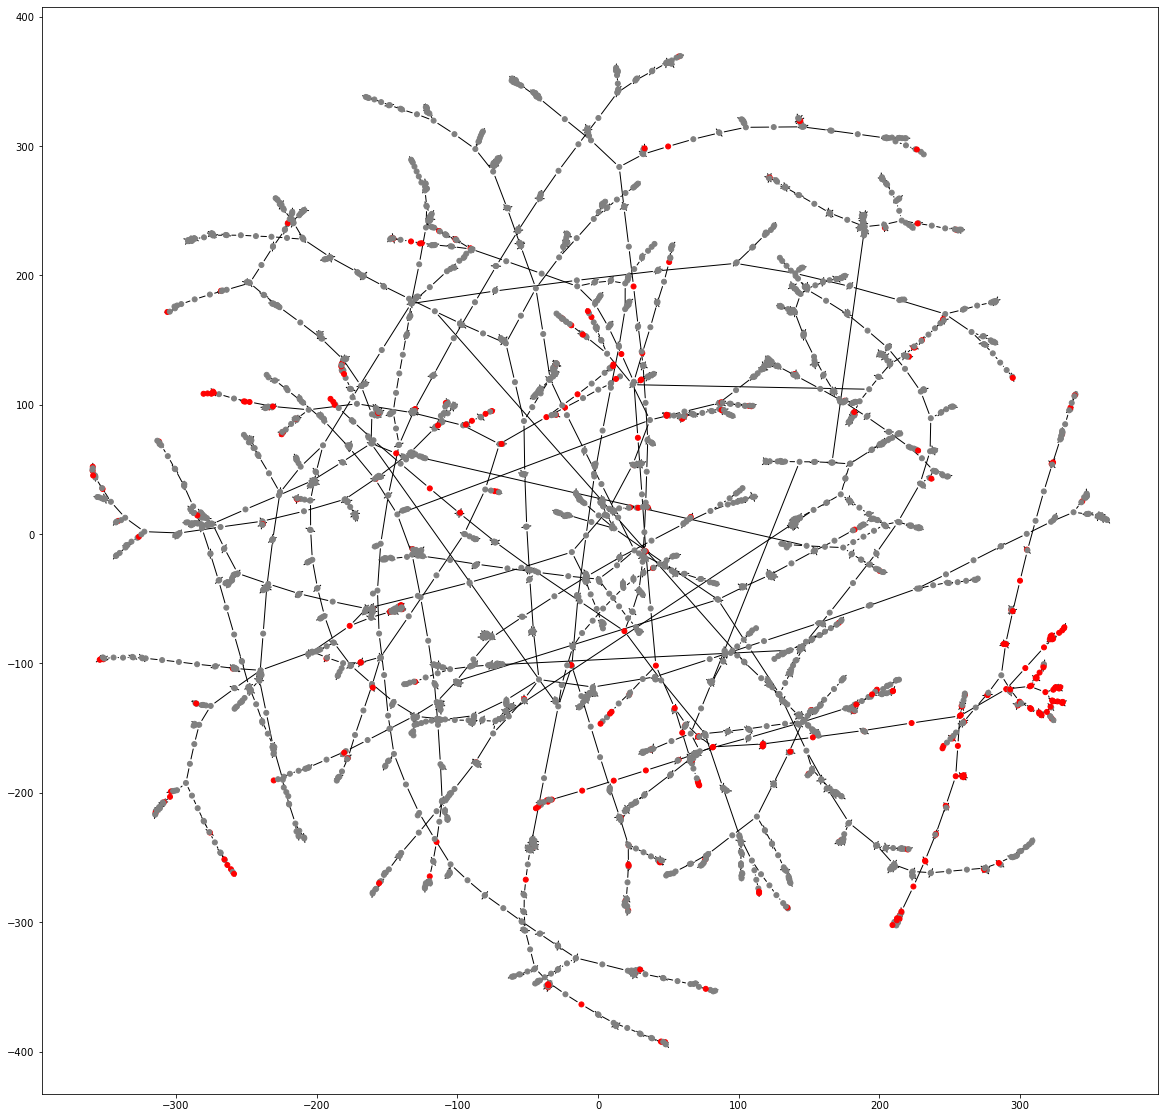

In [169]:
fig, ax = plt.subplots(figsize=(20, 20))
ig.plot(mst, target=ax, vertex_color = mst.vs['color'])